# Generating the dose-response curves of each solution

# Overview

This project is about the relationship of the annealing time versus the absorbance values of irradiated chemical dosimeters. Here, Sol. A, B, and C refer to the dosimeters with varying reagent concentrations that were exposed to ionizing radiation. The irradiation of each dosimeter was performed in increasing time intervals (i.e., 0 to 120 minutes of irradiation) After irradition, the dosimeters were exposed to heat (annealing) at specific time intervals (i.e., 0 to 96 hours) and were measured using a spectrometer to obtain the absorbance values.

The measure absorbance values were then imported to Python for analysis and visualization. Here, I used numpy, pandas, and SciPy libraries for data manipulation and curve fitting. Then, I used matplotlib for data visualization.

# Import Libraries & Files

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from scipy.optimize import curve_fit

edecay = pd.read_csv('EDecay.csv')
edecay2 = pd.read_csv('EDecay2.csv')


print(edecay.shape)
edecay.info()

(75, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DoseTime  75 non-null     int64  
 1   Sol       75 non-null     int64  
 2   AnTime    75 non-null     int64  
 3   AveAll    75 non-null     float64
 4   SDAll     75 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 3.1 KB


In [3]:
print(edecay2.shape)
edecay2.info()

(15, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DoseTime  15 non-null     int64  
 1   Sol       15 non-null     int64  
 2   AnTime    15 non-null     int64  
 3   AveAll    15 non-null     float64
 4   SDAll     15 non-null     float64
 5   Chabs     15 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 848.0 bytes


# Define Variables

In [4]:

SolA = edecay[edecay.Sol == 0]
SolB = edecay[edecay.Sol == 25]
SolC = edecay[edecay.Sol == 50]

SolA_0 = SolA[SolA.DoseTime == 0]
SolA_20 = SolA[SolA.DoseTime == 20]
SolA_40 = SolA[SolA.DoseTime == 40]
SolA_80 = SolA[SolA.DoseTime == 80]
SolA_120 = SolA[SolA.DoseTime == 120]

SolB_0 = SolB[SolB.DoseTime == 0]
SolB_20 = SolB[SolB.DoseTime == 20]
SolB_40 = SolB[SolB.DoseTime == 40]
SolB_80 = SolB[SolB.DoseTime == 80]
SolB_120 = SolB[SolB.DoseTime == 120]

SolC_0 = SolC[SolC.DoseTime == 0]
SolC_20 = SolC[SolC.DoseTime == 20]
SolC_40 = SolC[SolC.DoseTime == 40]
SolC_80 = SolC[SolC.DoseTime == 80]
SolC_120 = SolC[SolC.DoseTime == 120]

In [21]:
SolA

,DoseTime,Sol,AnTime,AveAll,SDAll
0,0,0,0,0.473333,0.004625
1,0,0,24,0.001083,0.001037
2,0,0,48,-0.000750,0.000722
3,0,0,72,0.002500,0.000645
4,0,0,96,0.000583,0.000493
5,20,0,0,0.536833,0.014328
6,20,0,24,0.001250,0.000722
7,20,0,48,0.000417,0.000954
8,20,0,72,0.002750,0.000829
9,20,0,96,0.001417,0.000759


In [5]:
SolA_0v2 = edecay2[edecay2.Sol == 0]
SolB_0v2 = edecay2[edecay2.Sol == 25]
SolC_0v2 = edecay2[edecay2.Sol == 50]

In [6]:
# X and Y
X = SolA_0['AnTime'].values
X2 = SolA_0v2['DoseTime'].values

YA_0 = SolA_0['AveAll'].values
YA_20 = SolA_20['AveAll'].values
YA_40 = SolA_40['AveAll'].values
YA_80 = SolA_80['AveAll'].values
YA_120 = SolA_120['AveAll'].values

YB_0 = SolB_0['AveAll'].values
YB_20 = SolB_20['AveAll'].values
YB_40 = SolB_40['AveAll'].values
YB_80 = SolB_80['AveAll'].values
YB_120 = SolB_120['AveAll'].values

YC_0 = SolC_0['AveAll'].values
YC_20 = SolC_20['AveAll'].values
YC_40 = SolC_40['AveAll'].values
YC_80 = SolC_80['AveAll'].values
YC_120 = SolC_120['AveAll'].values

In [7]:
X

array([ 0, 24, 48, 72, 96])

In [8]:
# Standard Deviation

SA_0 = SolA_0['SDAll'].values
SA_20 = SolA_20['SDAll'].values
SA_40 = SolA_40['SDAll'].values
SA_80 = SolA_80['SDAll'].values
SA_120 = SolA_120['SDAll'].values

SB_0 = SolB_0['SDAll'].values
SB_20 = SolB_20['SDAll'].values
SB_40 = SolB_40['SDAll'].values
SB_80 = SolB_80['SDAll'].values
SB_120 = SolB_120['SDAll'].values

SC_0 = SolC_0['SDAll'].values
SC_20 = SolC_20['SDAll'].values
SC_40 = SolC_40['SDAll'].values
SC_80 = SolC_80['SDAll'].values
SC_120 = SolC_120['SDAll'].values

# Initial visualization of the data

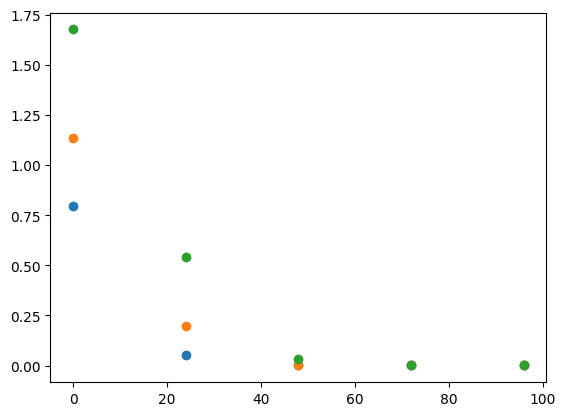

In [9]:

plt.plot(X,YC_0,"o")
plt.plot(X,YC_40,"o")
plt.plot(X,YC_120,"o")

plt.show()


The data shows an exponential decay trend. Thus, we apply the approproate fitting curve by defining an exponential decay function:

# Defining and Testing the Decay Function

In [10]:


# define type of function to search
def func(t, a1, l1):
    return a1 * np.exp(-l1*t)

In [11]:
g120 = [1.658,0.052617]

[1.68560229 0.05271853]


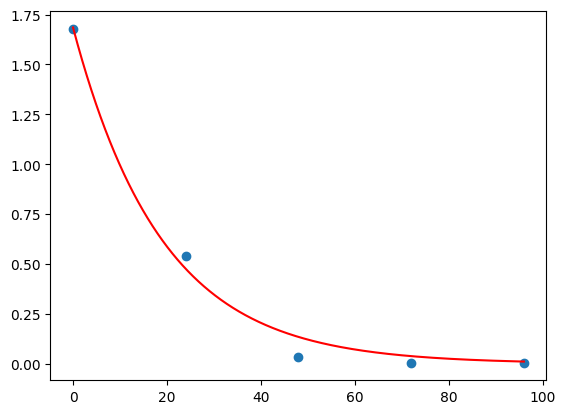

In [12]:
import matplotlib.pyplot as plt

n = len (X)
y = np.empty(n)
for i in range(n):
    y[i] = func(X[i],g120[0],g120[1])
    
plt.plot(X,YC_120, marker='o', ls='')

# plt.plot(X,y,'r-')
xfit = np.arange(0.0,96,0.01)

popt120, pcov = curve_fit(func, X,YC_120, g120)
print(popt120)
plt.plot(xfit, func(xfit, *popt120), 'r-', label='fit')

In [13]:
# Paramaters for each time measurement

# SOL A
g0_0 = [0.1,0.05]
g20_0 = [0.5,0.08]
g40_0 = [0.8,0.07]
g80_0 = [1.0,0.06]
g120_0 = [1.2,0.052617]

# SOL B
g0_25 = [0.1,0.05]
g20_25 = [0.9,0.08]
g40_25 = [1.1,0.07]
g80_25 = [1.4,0.06]
g120_25 = [1.658,0.052617]

# SOL C
g0 = [0.8,0.1]
g20 = [0.9,0.08]
g40 = [1.1,0.07]
g80 = [1.4,0.06]
g120 = [1.658,0.052617]

In [14]:
# SOL A
popt0_0, pcov0_0 = curve_fit(func, X,YA_0, g0_0)
popt20_0, pcov20_0 = curve_fit(func, X,YA_20, g20_0)
popt40_0, pcov40_0 = curve_fit(func, X,YA_40, g40_0)
popt80_0, pcov80_0 = curve_fit(func, X,YA_80, g80_0)
popt120_0, pcov120_0 = curve_fit(func, X,YA_120, g120_0)

# SOL B
popt0_25, pcov0_25 = curve_fit(func, X,YB_0, g0_25)
popt20_25, pcov20_25 = curve_fit(func, X,YB_20, g20_25)
popt40_25, pcov40_25 = curve_fit(func, X,YB_40, g40_25)
popt80_25, pcov80_25 = curve_fit(func, X,YB_80, g80_25)
popt120_25, pcov120_25 = curve_fit(func, X,YB_120, g120_25)

# SOL C
popt0, pcov0 = curve_fit(func, X,YC_0, g0)
popt20, pcov20 = curve_fit(func, X,YC_20, g20)
popt40, pcov40 = curve_fit(func, X,YC_40, g40)
popt80, pcov80 = curve_fit(func, X,YC_80, g80)
popt120, pcov120 = curve_fit(func, X,YC_120, g120)


# Plotting the 3 graphs in 1 Figure

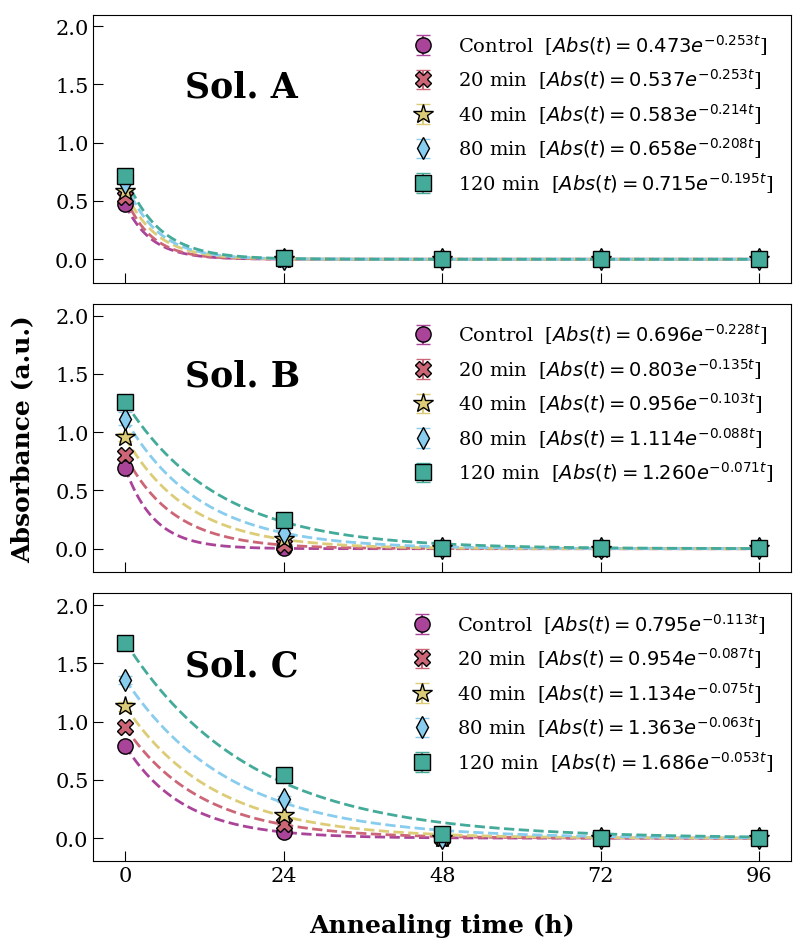

In [15]:
fig = plt.figure(figsize=(9,11))
plt.rcParams["font.family"] = "serif"

gs = fig.add_gridspec(3, hspace=.08)
axs = gs.subplots(sharex=True, sharey=True)
fig.add_subplot(111, frameon=False)

#Sol. A


axs[0].plot(xfit, func(xfit, *popt0_0),'--', color='#AA4499', lw=2)
axs[0].plot(xfit, func(xfit, *popt20_0),'--', color='#CC6677', lw=2)
axs[0].plot(xfit, func(xfit, *popt40_0),'--', color='#DDCC77', lw=2)
axs[0].plot(xfit, func(xfit, *popt80_0),'--', color='#88CCEE', lw=2)
axs[0].plot(xfit, func(xfit, *popt120_0),'--', color='#44AA99', lw=2)

axs[0].errorbar(X,YA_0, yerr=SA_0, capsize=5, marker='o', color='#AA4499', ms=11,
         mec='black', mfc='#AA4499', mew=1, ls='', label='Control  ' '[$Abs(t)=%2.3f e^{-%4.3ft}$]' % tuple(popt0_0))
axs[0].errorbar(X,YA_20,yerr=SA_20, capsize=5, marker='X', color='#CC6677', ms=11,
         mec='black', mfc='#CC6677', mew=1, ls='', label='20 min  ' '[$Abs(t)=%4.3f e^{-%4.3ft}$]' % tuple(popt20_0))
axs[0].errorbar(X,YA_40, yerr=SA_40, capsize=5, marker='*', color='#DDCC77', ms=15,
         mec='black', mfc='#DDCC77', mew=1, ls='', label='40 min  ' '[$Abs(t)=%5.3f e^{-%5.3ft}$]' % tuple(popt40_0))
axs[0].errorbar(X,YA_80, yerr=SA_80, capsize=5,marker='d', color='#88CCEE', ms=11,
         mec='black', mfc='#88CCEE', mew=1, ls='', label='80 min  ' '[$Abs(t)=%5.3f e^{-%5.3ft}$]' % tuple(popt80_0))
axs[0].errorbar(X,YA_120, yerr=SA_120, capsize=5, marker='s', color='#44AA99', ms=11,
         mec='black', mfc='#44AA99', mew=1, ls='', label='120 min  ' '[$Abs(t)=%5.3f e^{-%5.3ft}$]' % tuple(popt120_0))

axs[0].tick_params(direction='in', length=7, labelsize=15)

axs[0].legend(prop={'size': 14}, frameon=False)
axs[0].text(9, 1.4, 'Sol. A', fontweight='bold',fontsize=25)


#Sol. A


axs[1].plot(xfit, func(xfit, *popt0_25),'--', color='#AA4499', lw=2)
axs[1].plot(xfit, func(xfit, *popt20_25),'--', color='#CC6677', lw=2)
axs[1].plot(xfit, func(xfit, *popt40_25),'--', color='#DDCC77', lw=2)
axs[1].plot(xfit, func(xfit, *popt80_25),'--', color='#88CCEE', lw=2)
axs[1].plot(xfit, func(xfit, *popt120_25),'--', color='#44AA99', lw=2)

axs[1].errorbar(X,YB_0, yerr=SB_0, capsize=5, marker='o', color='#AA4499', ms=11,
         mec='black', mfc='#AA4499', mew=1, ls='', label='Control  ' '[$Abs(t)=%2.3f e^{-%4.3ft}$]' % tuple(popt0_25))
axs[1].errorbar(X,YB_20, yerr=SB_20, capsize=5, marker='X', color='#CC6677', ms=11,
         mec='black', mfc='#CC6677', mew=1, ls='', label='20 min  ' '[$Abs(t)=%4.3f e^{-%4.3ft}$]' % tuple(popt20_25))
axs[1].errorbar(X,YB_40, yerr=SB_40, capsize=5,marker='*', color='#DDCC77', ms=15,
         mec='black', mfc='#DDCC77', mew=1, ls='', label='40 min  ' '[$Abs(t)=%5.3f e^{-%5.3ft}$]' % tuple(popt40_25))
axs[1].errorbar(X,YB_80, yerr=SB_80, capsize=5,marker='d', color='#88CCEE', ms=11,
         mec='black', mfc='#88CCEE', mew=1, ls='', label='80 min  ' '[$Abs(t)=%5.3f e^{-%5.3ft}$]' % tuple(popt80_25))
axs[1].errorbar(X,YB_120, yerr=SB_120, capsize=5,marker='s', color='#44AA99', ms=11,
         mec='black', mfc='#44AA99', mew=1, ls='', label='120 min  ' '[$Abs(t)=%5.3f e^{-%5.3ft}$]' % tuple(popt120_25))

axs[1].tick_params(direction='in', length=7, labelsize=15)

axs[1].legend(prop={'size': 14}, frameon=False)
axs[1].text(9, 1.4, 'Sol. B', fontweight='bold',fontsize=25)


#Sol. C

axs[2].plot(xfit, func(xfit, *popt0),'--', color='#AA4499', lw=2)
axs[2].plot(xfit, func(xfit, *popt20),'--', color='#CC6677', lw=2)
axs[2].plot(xfit, func(xfit, *popt40),'--', color='#DDCC77', lw=2)
axs[2].plot(xfit, func(xfit, *popt80),'--', color='#88CCEE', lw=2)
axs[2].plot(xfit, func(xfit, *popt120),'--', color='#44AA99', lw=2)

axs[2].errorbar(X,YC_0, yerr=SC_0, capsize=5, marker='o', color='#AA4499', ms=11,
         mec='black', mfc='#AA4499', mew=1, ls='', label='Control  ' '[$Abs(t)=%5.3f e^{-%5.3ft}$]' % tuple(popt0))
axs[2].errorbar(X,YC_20, yerr=SC_20, capsize=5, marker='X', color='#CC6677', ms=11,
         mec='black', mfc='#CC6677', mew=1, ls='', label='20 min  ' '[$Abs(t)=%5.3f e^{-%4.3ft}$]' % tuple(popt20))
axs[2].errorbar(X,YC_40, yerr=SC_40, capsize=5,  marker='*', color='#DDCC77', ms=15,
         mec='black', mfc='#DDCC77', mew=1, ls='', label='40 min  ' '[$Abs(t)=%5.3f e^{-%5.3ft}$]' % tuple(popt40))
axs[2].errorbar(X,YC_80, yerr=SC_80, capsize=5, marker='d', color='#88CCEE', ms=11,
         mec='black', mfc='#88CCEE', mew=1, ls='', label='80 min  ' '[$Abs(t)=%5.3f e^{-%5.3ft}$]' % tuple(popt80))
axs[2].errorbar(X,YC_120, yerr=SC_120, capsize=5, marker='s', color='#44AA99', ms=11,
         mec='black', mfc='#44AA99', mew=1, ls='', label='120 min  ' '[$Abs(t)=%5.3f e^{-%5.3ft}$]' % tuple(popt120))

axs[2].tick_params(direction='in', length=7, labelsize=15)

axs[2].legend(prop={'size': 14}, frameon=False)
axs[2].text(9, 1.40, 'Sol. C', fontweight='bold',fontsize=25)
axs[2].set_xticks(np.arange(min(X), max(X)+24, 24))
axs[2].set_ylim(-0.2, 2.1)


plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

plt.xlabel('Annealing time (h)',size=18,fontweight='bold', labelpad=20)
plt.ylabel('Absorbance (a.u.)',size=18,fontweight='bold', labelpad=20)


# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

#
plt.savefig('DecaySolABC.jpg', bbox_inches='tight', transparent=False, dpi=250 )


# Analysis

All dosimeters exhibited exponential decay regardless of concentration, which was confirmed by the fitting curves. Sol. A had the lowest initial absorbance values after irradiation while Sol. C has the highest. This is due to a higher concentration of reagent 1 in Sol C. and vice versa. However, Sol. A was the fastest to reach 0 absorbance at just 24 hours after annealing. Sol. B was completely annealed at approximately 72 hours, while Sol. C required longer annealing time at approximately 96 hours.

In conclusion, higher sensitivity to ionizing radition is expected from dosimeters with high concentrations of reagent 1. However, the annealing time to "erase" the absorbance values in the dosimeter is longer with increasing reagent 1 concentration.